In [14]:
import pandas as pd
import copy
import requests
from tqdm.notebook import tqdm
from tqdm import tqdm
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By          # - 정보 획득
from selenium.webdriver.common.keys import Keys
# from engine_connect import create_engine_connect, db_connection
from sqlalchemy import create_engine
import os
import re
import time
from bs4 import BeautifulSoup
import warnings
import pymysql
import math
warnings.filterwarnings(action='ignore')
from selenium.webdriver.common.action_chains import ActionChains
import json


import time
import datetime as dt # 사용시 datetime.dt 로 사용 # 현재 시간 사용
from datetime import datetime # 사용시 함수로 바로 사용 #-> 시간 비교

In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
plt.rcParams.update({'font.family': 'NanumBarunGothic'})

import scipy
import scipy.stats as stats
# 경고창 무시
import warnings
warnings.filterwarnings('ignore')

In [16]:
### 한글 폰트 설치
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

path = 'c:/Windows/Fonts/malgun.ttf'  # 또는 나눔고딕: 'c:/Windows/Fonts/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

In [17]:
directory = os.getcwd()
print("Current working directory : ", directory)

#수집날짜
folder_date = str(dt.datetime.now().date())
folder_date = re.sub("-", ".", folder_date)
today = re.sub("\.", "", folder_date)
print('오늘 날짜 : ', folder_date)

now = dt.datetime.now()
print('현재 시간 : ', now)

Current working directory :  C:\Develops\Competetion_Gangneung_vision_planning
오늘 날짜 :  2024.08.12
현재 시간 :  2024-08-12 20:55:06.580191


In [80]:
df_trend_mention = pd.read_excel(f"{directory}/data/df_trend_mention.xlsx")
df_trend_keyword = pd.read_excel(f"{directory}/data/df_trend_keyword.xlsx")
df_sns_mention = pd.read_excel(f"{directory}/data/df_sns_mention.xlsx")

## 데이터 확인

In [20]:
df_trend_mention

,기준연월,여행유형/트렌드명,언급건수
0,202208,레포츠,8481
1,202208,휴식/힐링,8028
2,202207,휴식/힐링,7055
3,202207,레포츠,7018
4,202206,레포츠,6553
...,...,...,...
115,202301,체험,439
116,202311,체험,438
117,202304,체험,395
118,202312,체험,391


In [22]:
df_sns_mention

,기준연월,지역명,검색량(건)
0,202201,강원특별자치도 강릉시,48686
1,202202,강원특별자치도 강릉시,44928
2,202203,강원특별자치도 강릉시,45672
3,202204,강원특별자치도 강릉시,46671
4,202205,강원특별자치도 강릉시,63758
5,202206,강원특별자치도 강릉시,76353
6,202207,강원특별자치도 강릉시,84689
7,202208,강원특별자치도 강릉시,95372
8,202209,강원특별자치도 강릉시,68858
9,202210,강원특별자치도 강릉시,64286


In [23]:
df_trend_mention.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   기준연월       120 non-null    int64 
 1   여행유형/트렌드명  120 non-null    object
 2   언급건수       120 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.9+ KB


In [25]:
df_sns_mention.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기준연월    24 non-null     int64 
 1   지역명     24 non-null     object
 2   검색량(건)  24 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 708.0+ bytes


## 데이터 탐색

### 1. 트렌드 언급량 

In [26]:
df_trend_mention

,기준연월,여행유형/트렌드명,언급건수
0,202208,레포츠,8481
1,202208,휴식/힐링,8028
2,202207,휴식/힐링,7055
3,202207,레포츠,7018
4,202206,레포츠,6553
...,...,...,...
115,202301,체험,439
116,202311,체험,438
117,202304,체험,395
118,202312,체험,391


In [27]:
df_trend_mention['연도'] = df_trend_mention['기준연월'].astype(str).str[:4]
df_trend_mention['월'] = df_trend_mention['기준연월'].astype(str).str[4:6]
df_trend_mention

,기준연월,여행유형/트렌드명,언급건수,연도,월
0,202208,레포츠,8481,2022,08
1,202208,휴식/힐링,8028,2022,08
2,202207,휴식/힐링,7055,2022,07
3,202207,레포츠,7018,2022,07
4,202206,레포츠,6553,2022,06
...,...,...,...,...,...
115,202301,체험,439,2023,01
116,202311,체험,438,2023,11
117,202304,체험,395,2023,04
118,202312,체험,391,2023,12


In [28]:
df_2022_trend_mention = df_trend_mention.query("연도 =='2022'")
df_2023_trend_mention = df_trend_mention.query("연도 =='2023'")

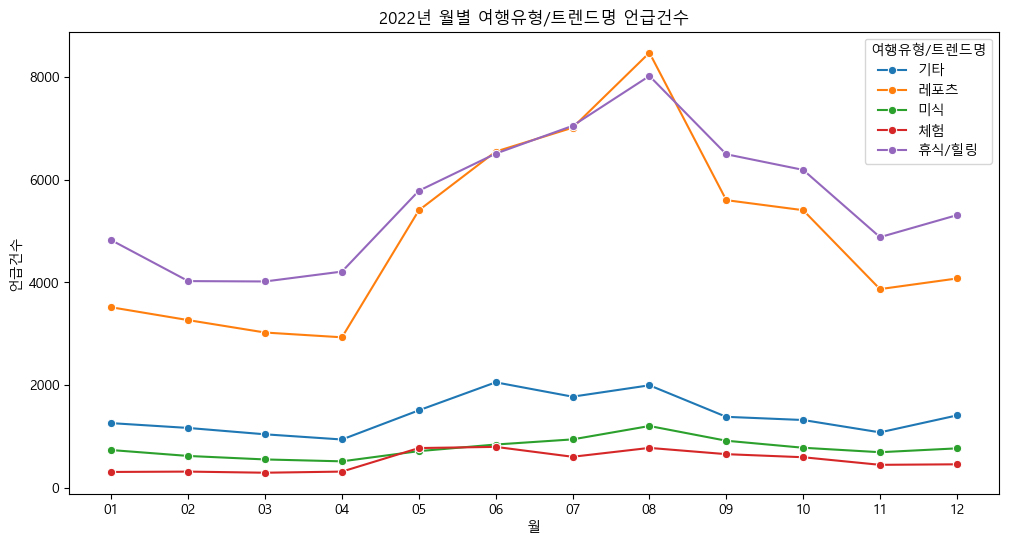

In [29]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_2022_trend_mention.groupby(['월', '여행유형/트렌드명'])['언급건수'].sum().reset_index(), x='월', y='언급건수', hue='여행유형/트렌드명', marker='o')

# 그래프 제목 및 레이블 설정
plt.title('2022년 월별 여행유형/트렌드명 언급건수')
plt.xlabel('월')
plt.ylabel('언급건수')
plt.legend(title='여행유형/트렌드명')
plt.show()

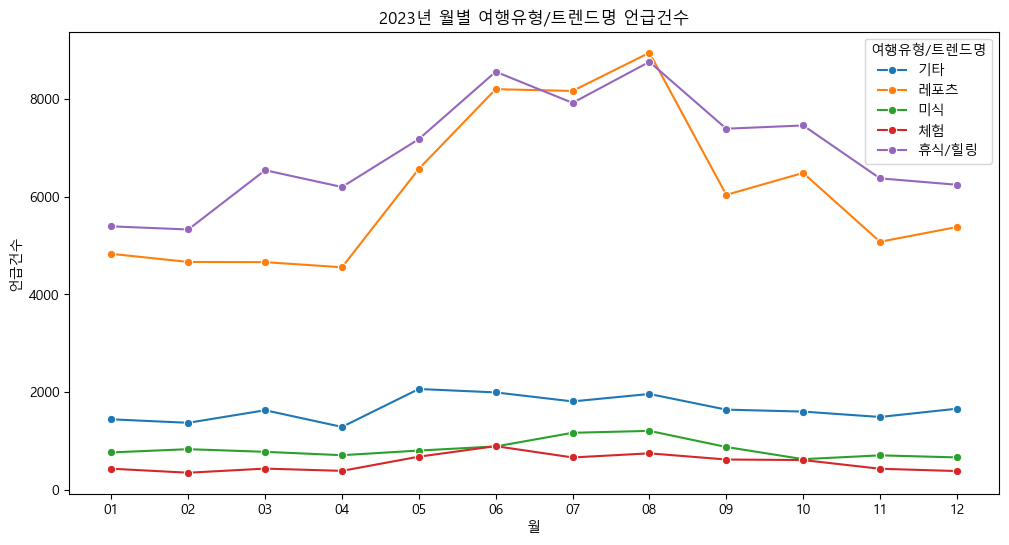

In [31]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_2023_trend_mention.groupby(['월', '여행유형/트렌드명'])['언급건수'].sum().reset_index(), x='월', y='언급건수', hue='여행유형/트렌드명', marker='o')

# 그래프 제목 및 레이블 설정
plt.title('2023년 월별 여행유형/트렌드명 언급건수')
plt.xlabel('월')
plt.ylabel('언급건수')
plt.legend(title='여행유형/트렌드명')
plt.show()

### 2. 트렌드 키워드

In [81]:
df_trend_keyword = df_trend_keyword.drop(columns='순위')
df_trend_keyword

,분류,관련 키워드,언급건수
0,휴식/힐링,힐링,29414
1,레포츠,캠핑,11137
2,레포츠,서핑,8686
3,기타,투어,6296
4,레포츠,등산,6075
...,...,...,...
757,레포츠,bsac,1
758,체험,귤체험,1
759,기타,일몰여행,1
760,체험,올레길체험,1


In [82]:
df_trend_keyword.query("분류 =='휴식/힐링'")

,분류,관련 키워드,언급건수
0,휴식/힐링,힐링,29414
5,휴식/힐링,나들이,5424
7,휴식/힐링,휴양,4405
9,휴식/힐링,호캉스,4102
11,휴식/힐링,피크닉,2667
...,...,...,...
739,휴식/힐링,황제관광,1
744,휴식/힐링,차캉스,1
750,휴식/힐링,몰캉스,1
751,휴식/힐링,북캉스,1


In [83]:
df_trend_keyword_top10_healing = df_trend_keyword.query("분류 =='휴식/힐링'").groupby("관련 키워드")["언급건수"].sum().reset_index().sort_values("언급건수", ascending = False)[:10]
df_trend_keyword_top10_healing

,관련 키워드,언급건수
72,힐링,68741
5,나들이,12754
71,휴양,9933
63,호캉스,8139
58,피크닉,5653
15,물멍,5105
21,불멍,4612
31,야영,4542
43,즐길거리,4129
17,바다멍,3664


In [84]:
df_trend_keyword_top10_leports = df_trend_keyword.query("분류 =='레포츠'").groupby("관련 키워드")["언급건수"].sum().reset_index().sort_values("언급건수", ascending = False)[:10]
df_trend_keyword_top10_leports

,관련 키워드,언급건수
97,캠핑,22772
44,서핑,17670
19,등산,14357
61,스키,11773
15,낚시,10425
42,산행,5652
91,차박,5615
22,레저,5531
105,트레킹,3565
54,스노쿨링,2569


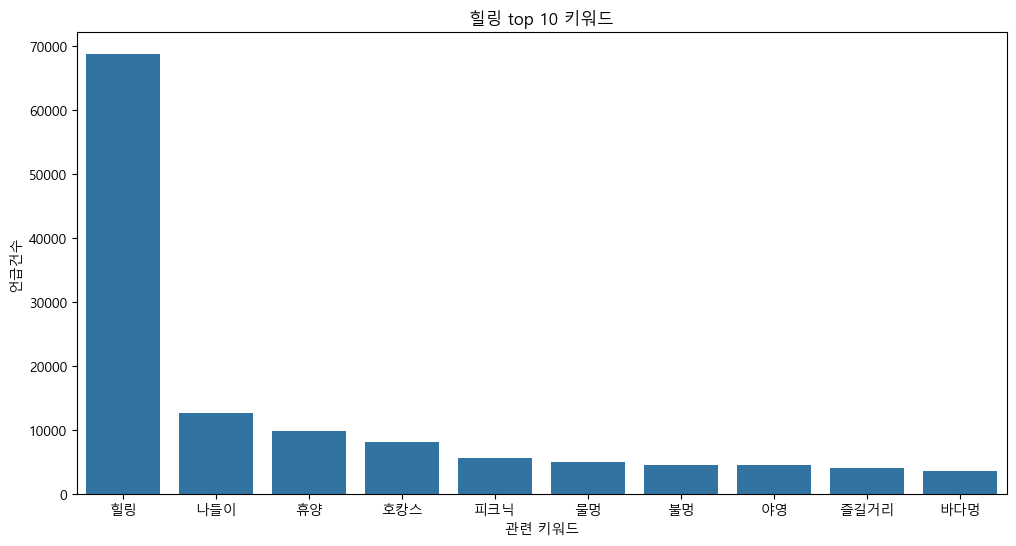

In [87]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_trend_keyword_top10_healing, x='관련 키워드', y='언급건수')

# 그래프 제목 및 레이블 설정
plt.title('힐링 top 10 키워드')
plt.xlabel('관련 키워드')
plt.ylabel('언급건수')
plt.show()

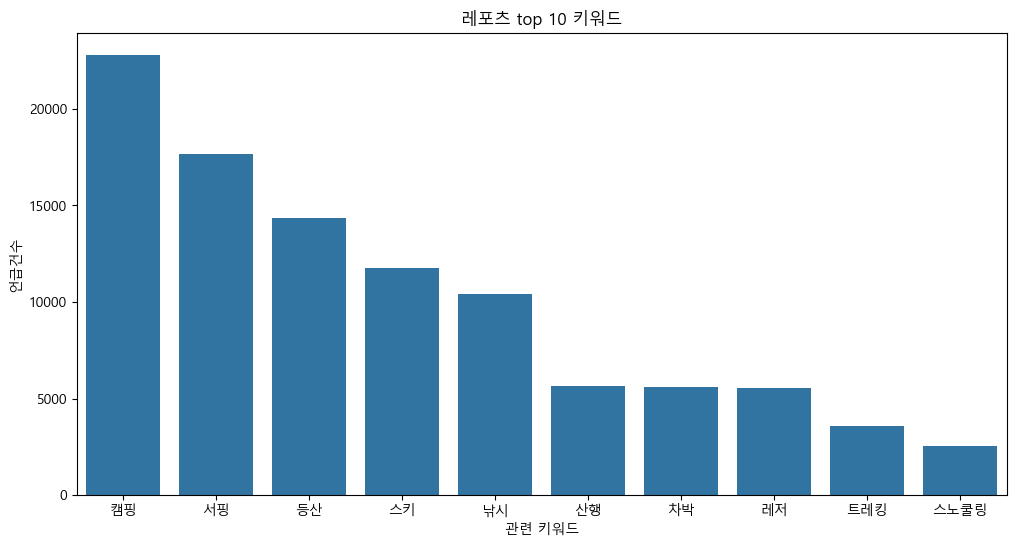

In [88]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_trend_keyword_top10_leports, x='관련 키워드', y='언급건수')

# 그래프 제목 및 레이블 설정
plt.title('레포츠 top 10 키워드')
plt.xlabel('관련 키워드')
plt.ylabel('언급건수')
plt.show()

### 3. SNS 언급량

In [89]:
df_sns_mention

,기준연월,지역명,검색량(건)
0,202201,강원특별자치도 강릉시,48686
1,202202,강원특별자치도 강릉시,44928
2,202203,강원특별자치도 강릉시,45672
3,202204,강원특별자치도 강릉시,46671
4,202205,강원특별자치도 강릉시,63758
5,202206,강원특별자치도 강릉시,76353
6,202207,강원특별자치도 강릉시,84689
7,202208,강원특별자치도 강릉시,95372
8,202209,강원특별자치도 강릉시,68858
9,202210,강원특별자치도 강릉시,64286


In [90]:
df_sns_mention['연도'] = df_sns_mention['기준연월'].astype(str).str[:4]
df_sns_mention['월'] = df_sns_mention['기준연월'].astype(str).str[4:6]
df_sns_mention

,기준연월,지역명,검색량(건),연도,월
0,202201,강원특별자치도 강릉시,48686,2022,01
1,202202,강원특별자치도 강릉시,44928,2022,02
2,202203,강원특별자치도 강릉시,45672,2022,03
3,202204,강원특별자치도 강릉시,46671,2022,04
4,202205,강원특별자치도 강릉시,63758,2022,05
5,202206,강원특별자치도 강릉시,76353,2022,06
6,202207,강원특별자치도 강릉시,84689,2022,07
7,202208,강원특별자치도 강릉시,95372,2022,08
8,202209,강원특별자치도 강릉시,68858,2022,09
9,202210,강원특별자치도 강릉시,64286,2022,10


In [91]:
df_2022_sns_mention = df_sns_mention.query("연도 =='2022'")
df_2023_sns_mention = df_sns_mention.query("연도 =='2023'")

In [92]:
df_2022_sns_mention

,기준연월,지역명,검색량(건),연도,월
0,202201,강원특별자치도 강릉시,48686,2022,01
1,202202,강원특별자치도 강릉시,44928,2022,02
2,202203,강원특별자치도 강릉시,45672,2022,03
3,202204,강원특별자치도 강릉시,46671,2022,04
4,202205,강원특별자치도 강릉시,63758,2022,05
5,202206,강원특별자치도 강릉시,76353,2022,06
6,202207,강원특별자치도 강릉시,84689,2022,07
7,202208,강원특별자치도 강릉시,95372,2022,08
8,202209,강원특별자치도 강릉시,68858,2022,09
9,202210,강원특별자치도 강릉시,64286,2022,10


In [93]:
df_2023_sns_mention

,기준연월,지역명,검색량(건),연도,월
12,202301,강원특별자치도 강릉시,65556,2023,01
13,202302,강원특별자치도 강릉시,64789,2023,02
14,202303,강원특별자치도 강릉시,68719,2023,03
15,202304,강원특별자치도 강릉시,70269,2023,04
16,202305,강원특별자치도 강릉시,78430,2023,05
17,202306,강원특별자치도 강릉시,88410,2023,06
18,202307,강원특별자치도 강릉시,90145,2023,07
19,202308,강원특별자치도 강릉시,109774,2023,08
20,202309,강원특별자치도 강릉시,84259,2023,09
21,202310,강원특별자치도 강릉시,81526,2023,10
